<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_preclass_ass4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematics for Machine Learning Pre-class assignment 4 (optional) Darts throwing problem
## [Problem 1] Choosing a dart mat

In [82]:
import numpy as np

np.random.seed(0)

dices = np.arange(1, 7)  # Number of dices are 6 counted from 0
dart = np.random.choice(dices)
print(f"Dart chosen is dart {dart}")
print(dices)

Dart chosen is dart 5
[1 2 3 4 5 6]


## [Problem 2] Throw darts and record the place

In [83]:
# Choose x, y coordinates from multivariate normal distribution
mean = [0, 0]               # Sample shows that mean is 0
cov = [[.01, 0], [0, .01]]  # Variance is 0.1^2
x, y = np.random.multivariate_normal(mean, cov, 1)[0]
print(f"Location of dart: ({x}, {y})")

Location of dart: (0.11227949188291289, 0.03028052195530815)


## [Problem 3] Throw a lot of darts and record them in a state of being tied to the number

Initialize dart mats tracking dictionary with a list of dart location (using tuple (x,y) for 2 coordinates)

In [84]:
n_darts = 1000
darts_track = {}

for i in range(n_darts):
    dart_mat = np.random.choice(dices)
    x = np.random.normal(loc=dart_mat, scale=0.1)   # loc for drawing
    y = np.random.normal(loc=0, scale=0.1)
    
    if dart_mat in darts_track:
        darts_track[dart_mat] = np.concatenate((darts_track[dart_mat], [[x, y]]))
    else:
        darts_track[dart_mat] = np.array([[x, y]])

## [Problem 4] Drawing the position of the darts

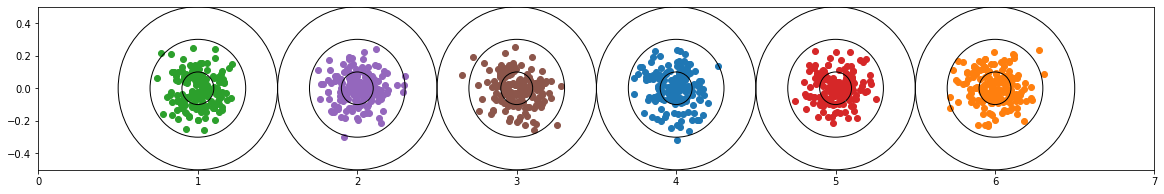

In [88]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 3))
for dart, locs in darts_track.items():
    plt.scatter(locs[:,0], locs[:,1])
    cir_1 = mpatches.Circle(xy=(dart, 0), radius=0.1, fill=False)
    cir_2 = mpatches.Circle(xy=(dart, 0), radius=0.3, fill=False)
    cir_3 = mpatches.Circle(xy=(dart, 0), radius=0.5, fill=False)
    ax.add_patch(cir_1)
    ax.add_patch(cir_2)
    ax.add_patch(cir_3)

ax.set_xlim(0, 7)
ax.set_ylim(-0.5, 0.5)
plt.show()

## [Problem 5] Functionalization

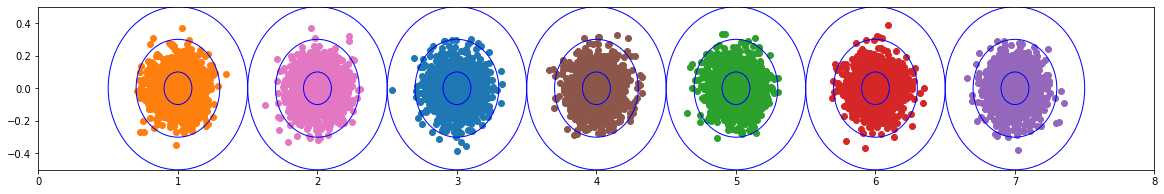

In [89]:
def darts(n_darts, n_mats):
    darts_track = {}

    for _ in range(n_darts):
        loc = np.random.randint(1, n_mats + 1)
        x = np.random.normal(loc=loc, scale=0.1)
        y = np.random.normal(loc=0, scale=0.1)

        if loc in darts_track:
            darts_track[loc] = np.concatenate((darts_track[loc], [[x, y]]))
        else:
            darts_track[loc] = np.array([[x, y]])
    
    fig, ax = plt.subplots(figsize=(20, 3))
    for dart, locs in darts_track.items():
        plt.scatter(locs[:,0], locs[:,1])
        cir_1 = mpatches.Circle(xy=(dart, 0), radius=0.1, ec='b', fill=False)
        cir_2 = mpatches.Circle(xy=(dart, 0), radius=0.3, ec='b', fill=False)
        cir_3 = mpatches.Circle(xy=(dart, 0), radius=0.5, ec='b', fill=False)
        ax.add_patch(cir_1)
        ax.add_patch(cir_2)
        ax.add_patch(cir_3)

    ax.set_xlim(0, n_mats + 1)
    ax.set_ylim(-0.5, 0.5)
    plt.show()

darts(10000, 7)